In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd '/content/gdrive/MyDrive/Kaggle 팀 과제/집 가격 예측(회귀)'
path = '/content/gdrive/MyDrive/Kaggle 팀 과제/집 가격 예측(회귀)'
!ls

/content/gdrive/.shortcut-targets-by-id/1EoJgFet78Cqka5-cEF0_OIL7aL7xQ5KB/Kaggle 팀 과제/집 가격 예측(회귀)
'220729 초안 0.1.ipynb'			  submission10.csv
'220730 nearest_sch_ranking_정리.ipynb'   submission2.csv
'220730 nearest_sch_ranking.ipynb'	  submission3.csv
 garage2.csv				  submission4.csv
 garage.csv				  submission5.csv
 gpu_test2.csv				  submission6.csv
 gpu_test3.csv				  submission7.csv
 gpu_test4.csv				  submission8.csv
 gpu_test.csv				  submission9.csv
 rank2.csv				  submission.csv
 rank.csv				  test.csv
 rank+garage.csv			  total2.csv
 regression220718.zip			  total.csv
 sample_submission.csv			  train.csv


In [ ]:
!unzip -o -qq regression220718.zip

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [ ]:
train_df

,ID,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,0,9 Crumlin Way,Ridgewood,520000,5,2,4.0,674,266,2007.0,35500,Butler Station,3000,09-2015\r,6030,-31.656206,115.720566,IRENE MCCORMACK CATHOLIC COLLEGE,1.079230,120.0
1,1,37 Sissinghurst Crescent,Landsdale,575000,5,4,2.0,540,301,2014.0,16900,Whitfords Station,8100,07-2018\r,6065,-31.800802,115.867675,LANDSDALE CHRISTIAN SCHOOL,0.667585,NaN
2,2,24 Tees Court,Mindarie,760000,4,2,2.0,781,220,1992.0,33500,Clarkson Station,3500,02-2020\r,6030,-31.682040,115.702600,MINDARIE SENIOR COLLEGE,0.650761,111.0
3,3,31 Brentham Street,Mount Hawthorn,1230000,2,1,2.0,425,185,1938.0,3500,Leederville Station,1500,07-2020\r,6016,-31.926046,115.838181,ARANMORE CATHOLIC COLLEGE,0.484465,106.0
4,4,46/1 Corkhill Street,North Fremantle,2010000,3,2,2.0,546,186,2004.0,12900,North Fremantle Station,800,10-2017\r,6159,-32.032079,115.759626,JOHN CURTIN COLLEGE OF THE ARTS,1.869050,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18505,18505,36 Kentucky Boulevard,Hocking,475000,4,2,2.0,533,198,2007.0,21200,Edgewater Station,4400,04-2018\r,6065,-31.764187,115.824151,WANNEROO SECONDARY COLLEGE,1.104533,131.0
18506,18506,10 Regatta Boulevard,Champion Lakes,485000,3,2,2.0,344,237,2010.0,22100,Kelmscott Station,1900,06-2011\r,6111,-32.114990,115.992834,JOHN WOLLASTON ANGLICAN COMMUNITY SCHOOL,1.816768,40.0
18507,18507,145 Coolgardie Avenue,Redcliffe,642000,3,1,1.0,1016,110,1953.0,8900,Bassendean Station,3100,01-2018\r,6104,-31.931320,115.950060,CYRIL JACKSON SENIOR CAMPUS,2.169696,NaN
18508,18508,12 Mckenzie Road,Samson,491000,4,2,2.0,718,176,1988.0,14600,Murdoch Station,5400,03-2009\r,6163,-32.070861,115.793834,SETON CATHOLIC COLLEGE,0.208669,91.0


In [ ]:
sample_submission = pd.read_csv('sample_submission.csv')

In [ ]:
test_id_idx = sample_submission['ID']

In [ ]:
test_id_idx

0        18510
1        18511
2        18512
3        18513
4        18514
         ...  
15141    33651
15142    33652
15143    33653
15144    33654
15145    33655
Name: ID, Length: 15146, dtype: int64

In [ ]:
len_train_df = len(train_df)
len_test_df = len(test_df)

In [ ]:
df = pd.concat([train_df, test_df])

In [ ]:
df

,ID,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,0,9 Crumlin Way,Ridgewood,520000.0,5,2,4.0,674,266,2007.0,35500,Butler Station,3000,09-2015\r,6030,-31.656206,115.720566,IRENE MCCORMACK CATHOLIC COLLEGE,1.079230,120.0
1,1,37 Sissinghurst Crescent,Landsdale,575000.0,5,4,2.0,540,301,2014.0,16900,Whitfords Station,8100,07-2018\r,6065,-31.800802,115.867675,LANDSDALE CHRISTIAN SCHOOL,0.667585,NaN
2,2,24 Tees Court,Mindarie,760000.0,4,2,2.0,781,220,1992.0,33500,Clarkson Station,3500,02-2020\r,6030,-31.682040,115.702600,MINDARIE SENIOR COLLEGE,0.650761,111.0
3,3,31 Brentham Street,Mount Hawthorn,1230000.0,2,1,2.0,425,185,1938.0,3500,Leederville Station,1500,07-2020\r,6016,-31.926046,115.838181,ARANMORE CATHOLIC COLLEGE,0.484465,106.0
4,4,46/1 Corkhill Street,North Fremantle,2010000.0,3,2,2.0,546,186,2004.0,12900,North Fremantle Station,800,10-2017\r,6159,-32.032079,115.759626,JOHN CURTIN COLLEGE OF THE ARTS,1.869050,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15141,33651,2 Danehill Place,Balga,NaN,3,1,NaN,801,108,1996.0,10800,Warwick Station,3900,04-2018\r,6061,-31.857800,115.834370,BALGA SENIOR HIGH SCHOOL,1.352896,NaN
15142,33652,19 Hester Street,Langford,NaN,4,2,2.0,530,158,1998.0,13100,Thornlie Station,854,11-2018\r,6147,-32.039400,115.951670,COMMUNICARE ACADEMY,1.526169,NaN
15143,33653,43 Hale Street,Watermans Bay,NaN,3,2,2.0,1072,148,1950.0,14700,Warwick Station,3800,02-2015\r,6020,-31.852980,115.757010,CARINE SENIOR HIGH SCHOOL,1.779797,47.0
15144,33654,980 Bushlands Road,Hovea,NaN,5,3,2.0,19996,396,1990.0,24900,Midland Station,10200,09-2012\r,6071,-31.878930,116.107640,HELENA COLLEGE,3.523922,78.0


In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
for col in train_df.columns:
    print(col, train_df[col].nunique(), '', sep = '\n')

ID
18510

ADDRESS
18491

SUBURB
318

PRICE
1806

BEDROOMS
10

BATHROOMS
6

GARAGE
22

LAND_AREA
3091

FLOOR_AREA
478

BUILD_YEAR
120

CBD_DIST
579

NEAREST_STN
68

NEAREST_STN_DIST
1080

DATE_SOLD
331

POSTCODE
114

LATITUDE
17203

LONGITUDE
16846

NEAREST_SCH
159

NEAREST_SCH_DIST
18397

NEAREST_SCH_RANK
103



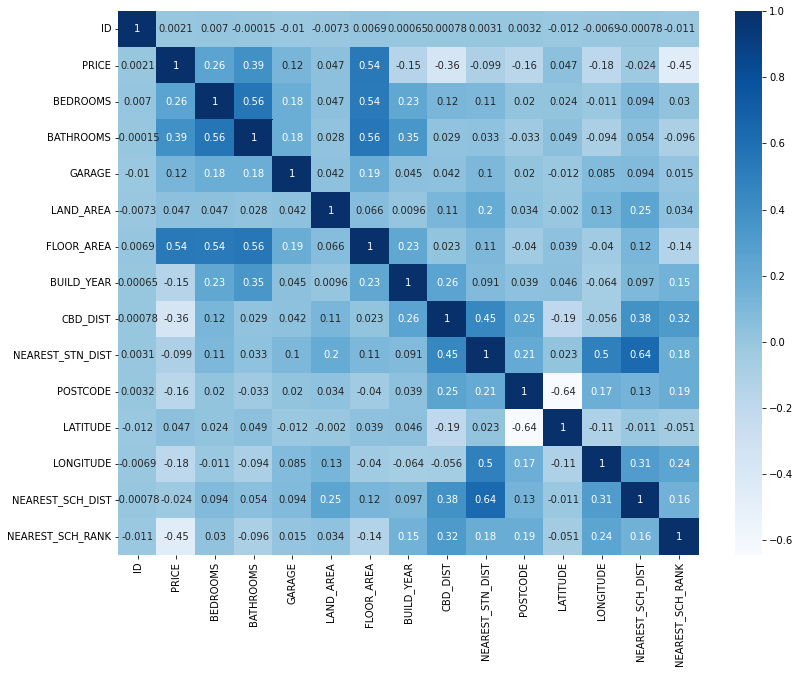

In [ ]:
plt.figure(figsize=(13,10))
g = sns.heatmap(train_df.corr(),annot=True,cmap="Blues")

In [ ]:
school_rank = train_df[['PRICE', 'NEAREST_SCH', 'NEAREST_SCH_RANK']].groupby('NEAREST_SCH').mean()
school_rank = school_rank.sort_values(by=['PRICE'], ascending=False)
school_rank['no'] = school_rank.reset_index().index +1
school_rank['NEAREST_SCH_RANK'] = np.where(pd.notnull(school_rank['NEAREST_SCH_RANK']) == True, school_rank['NEAREST_SCH_RANK'], school_rank['no'])
school_rank = school_rank.drop('no', axis=1).drop('PRICE', axis=1)
# train에는 없고, test에는 있는 SOUTH METROPOLITAN YOUTH LINK COMMUNITY COLLEGE 를 수동으로 추가해준다.
school_rank.loc['SOUTH METROPOLITAN YOUTH LINK COMMUNITY COLLEGE'] = 160.0
school_rank

,NEAREST_SCH_RANK
NEAREST_SCH,
ST HILDA'S ANGLICAN SCHOOL FOR GIRLS,2.0
METHODIST LADIES' COLLEGE,5.0
CHRIST CHURCH GRAMMAR SCHOOL,3.0
SCOTCH COLLEGE,24.0
PRESBYTERIAN LADIES COLLEGE,11.0
...,...
EMMANUEL CHRISTIAN COMMUNITY SCHOOL,156.0
BALGA SENIOR HIGH SCHOOL,157.0
KOLBE CATHOLIC COLLEGE,97.0


In [ ]:
X_train = train_df
school_rank_list = []
for index in X_train.T.iteritems():
    if pd.notnull(index[1]['NEAREST_SCH_RANK']) == False:
        school_name = index[1]['NEAREST_SCH']
        rank_temp = school_rank.query(f'NEAREST_SCH == "{school_name}"').NEAREST_SCH_RANK[0]
        school_rank_list.append(rank_temp)
    else:
        school_rank_list.append(index[1]['NEAREST_SCH_RANK'])
merge_df = pd.concat([X_train, pd.Series(school_rank_list)], axis=1)
merge_df.rename(columns = {0 : 'new_rank'}, inplace = True)
merge_df

,ID,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,...,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK,new_rank
0,0,9 Crumlin Way,Ridgewood,520000,5,2,4.0,674,266,2007.0,...,Butler Station,3000,09-2015\r,6030,-31.656206,115.720566,IRENE MCCORMACK CATHOLIC COLLEGE,1.079230,120.0,120.0
1,1,37 Sissinghurst Crescent,Landsdale,575000,5,4,2.0,540,301,2014.0,...,Whitfords Station,8100,07-2018\r,6065,-31.800802,115.867675,LANDSDALE CHRISTIAN SCHOOL,0.667585,NaN,73.0
2,2,24 Tees Court,Mindarie,760000,4,2,2.0,781,220,1992.0,...,Clarkson Station,3500,02-2020\r,6030,-31.682040,115.702600,MINDARIE SENIOR COLLEGE,0.650761,111.0,111.0
3,3,31 Brentham Street,Mount Hawthorn,1230000,2,1,2.0,425,185,1938.0,...,Leederville Station,1500,07-2020\r,6016,-31.926046,115.838181,ARANMORE CATHOLIC COLLEGE,0.484465,106.0,106.0
4,4,46/1 Corkhill Street,North Fremantle,2010000,3,2,2.0,546,186,2004.0,...,North Fremantle Station,800,10-2017\r,6159,-32.032079,115.759626,JOHN CURTIN COLLEGE OF THE ARTS,1.869050,25.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18505,18505,36 Kentucky Boulevard,Hocking,475000,4,2,2.0,533,198,2007.0,...,Edgewater Station,4400,04-2018\r,6065,-31.764187,115.824151,WANNEROO SECONDARY COLLEGE,1.104533,131.0,131.0
18506,18506,10 Regatta Boulevard,Champion Lakes,485000,3,2,2.0,344,237,2010.0,...,Kelmscott Station,1900,06-2011\r,6111,-32.114990,115.992834,JOHN WOLLASTON ANGLICAN COMMUNITY SCHOOL,1.816768,40.0,40.0
18507,18507,145 Coolgardie Avenue,Redcliffe,642000,3,1,1.0,1016,110,1953.0,...,Bassendean Station,3100,01-2018\r,6104,-31.931320,115.950060,CYRIL JACKSON SENIOR CAMPUS,2.169696,NaN,91.0
18508,18508,12 Mckenzie Road,Samson,491000,4,2,2.0,718,176,1988.0,...,Murdoch Station,5400,03-2009\r,6163,-32.070861,115.793834,SETON CATHOLIC COLLEGE,0.208669,91.0,91.0


In [ ]:
train_df = merge_df.drop('NEAREST_SCH_RANK', axis = 1)

In [ ]:
train_df.rename(columns = {'new_rank' : 'NEAREST_SCH_RANK'}, inplace = True)

In [ ]:
train_df

,ID,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,0,9 Crumlin Way,Ridgewood,520000,5,2,4.0,674,266,2007.0,35500,Butler Station,3000,09-2015\r,6030,-31.656206,115.720566,IRENE MCCORMACK CATHOLIC COLLEGE,1.079230,120.0
1,1,37 Sissinghurst Crescent,Landsdale,575000,5,4,2.0,540,301,2014.0,16900,Whitfords Station,8100,07-2018\r,6065,-31.800802,115.867675,LANDSDALE CHRISTIAN SCHOOL,0.667585,73.0
2,2,24 Tees Court,Mindarie,760000,4,2,2.0,781,220,1992.0,33500,Clarkson Station,3500,02-2020\r,6030,-31.682040,115.702600,MINDARIE SENIOR COLLEGE,0.650761,111.0
3,3,31 Brentham Street,Mount Hawthorn,1230000,2,1,2.0,425,185,1938.0,3500,Leederville Station,1500,07-2020\r,6016,-31.926046,115.838181,ARANMORE CATHOLIC COLLEGE,0.484465,106.0
4,4,46/1 Corkhill Street,North Fremantle,2010000,3,2,2.0,546,186,2004.0,12900,North Fremantle Station,800,10-2017\r,6159,-32.032079,115.759626,JOHN CURTIN COLLEGE OF THE ARTS,1.869050,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18505,18505,36 Kentucky Boulevard,Hocking,475000,4,2,2.0,533,198,2007.0,21200,Edgewater Station,4400,04-2018\r,6065,-31.764187,115.824151,WANNEROO SECONDARY COLLEGE,1.104533,131.0
18506,18506,10 Regatta Boulevard,Champion Lakes,485000,3,2,2.0,344,237,2010.0,22100,Kelmscott Station,1900,06-2011\r,6111,-32.114990,115.992834,JOHN WOLLASTON ANGLICAN COMMUNITY SCHOOL,1.816768,40.0
18507,18507,145 Coolgardie Avenue,Redcliffe,642000,3,1,1.0,1016,110,1953.0,8900,Bassendean Station,3100,01-2018\r,6104,-31.931320,115.950060,CYRIL JACKSON SENIOR CAMPUS,2.169696,91.0
18508,18508,12 Mckenzie Road,Samson,491000,4,2,2.0,718,176,1988.0,14600,Murdoch Station,5400,03-2009\r,6163,-32.070861,115.793834,SETON CATHOLIC COLLEGE,0.208669,91.0


In [ ]:
X_test = test_df
school_rank_list = []
for index in X_test.T.iteritems():
    if pd.notnull(index[1]['NEAREST_SCH_RANK']) == False:
        school_name = index[1]['NEAREST_SCH']
        rank_temp = school_rank.query(f'NEAREST_SCH == "{school_name}"').NEAREST_SCH_RANK[0]
        school_rank_list.append(rank_temp)
    else:
        school_rank_list.append(index[1]['NEAREST_SCH_RANK'])
merge_df2 = pd.concat([X_test, pd.Series(school_rank_list)], axis=1)
merge_df2.rename(columns = {0 : 'new_rank'}, inplace = True)
merge_df2

,ID,ADDRESS,SUBURB,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK,new_rank
0,18510,29 Hartung Street,Mundaring,3,2,3.0,2199,159,1950.0,29600,Midland Station,15600,03-2019\r,6073,-31.899705,116.166117,MUNDARING CHRISTIAN COLLEGE,1.341198,NaN,71.0
1,18511,6 Kirkby Ridge,Salter Point,4,3,2.0,509,341,2001.0,8200,Canning Bridge Station,2000,08-2017\r,6152,-32.018620,115.858900,AQUINAS COLLEGE,0.882405,23.0,23.0
2,18512,45 Connelly Way,Booragoon,4,3,2.0,725,251,1982.0,10500,Bull Creek Station,2700,07-2018\r,6154,-32.042090,115.826290,APPLECROSS SENIOR HIGH SCHOOL,1.639635,34.0,34.0
3,18513,21 Torrenova Way,Sinagra,3,2,2.0,401,169,2009.0,24100,Joondalup Station,3500,05-2014\r,6065,-31.740480,115.804078,WANNEROO SECONDARY COLLEGE,2.199511,131.0,131.0
4,18514,4B Hilo Place,Warnbro,3,1,1.0,474,107,1993.0,43600,Warnbro Station,1100,03-2019\r,6169,-32.335790,115.765140,WARNBRO COMMUNITY HIGH SCHOOL,1.227092,NaN,154.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15141,33651,2 Danehill Place,Balga,3,1,NaN,801,108,1996.0,10800,Warwick Station,3900,04-2018\r,6061,-31.857800,115.834370,BALGA SENIOR HIGH SCHOOL,1.352896,NaN,157.0
15142,33652,19 Hester Street,Langford,4,2,2.0,530,158,1998.0,13100,Thornlie Station,854,11-2018\r,6147,-32.039400,115.951670,COMMUNICARE ACADEMY,1.526169,NaN,148.0
15143,33653,43 Hale Street,Watermans Bay,3,2,2.0,1072,148,1950.0,14700,Warwick Station,3800,02-2015\r,6020,-31.852980,115.757010,CARINE SENIOR HIGH SCHOOL,1.779797,47.0,47.0
15144,33654,980 Bushlands Road,Hovea,5,3,2.0,19996,396,1990.0,24900,Midland Station,10200,09-2012\r,6071,-31.878930,116.107640,HELENA COLLEGE,3.523922,78.0,78.0


In [ ]:
test_df = merge_df2.drop('NEAREST_SCH_RANK', axis = 1)

In [ ]:
test_df.rename(columns = {'new_rank' : 'NEAREST_SCH_RANK'}, inplace = True)

In [ ]:
train_df['GARAGE'].fillna(0, inplace = True)

In [ ]:
test_df['GARAGE'].fillna(0, inplace = True)

In [ ]:
corrmat = train_df.corr()
top_corr_features = corrmat.index[abs(corrmat["PRICE"])>=0.01]
top_corr_features

Index(['PRICE', 'BEDROOMS', 'BATHROOMS', 'GARAGE', 'LAND_AREA', 'FLOOR_AREA',
       'BUILD_YEAR', 'CBD_DIST', 'NEAREST_STN_DIST', 'POSTCODE', 'LATITUDE',
       'LONGITUDE', 'NEAREST_SCH_DIST', 'NEAREST_SCH_RANK'],
      dtype='object')

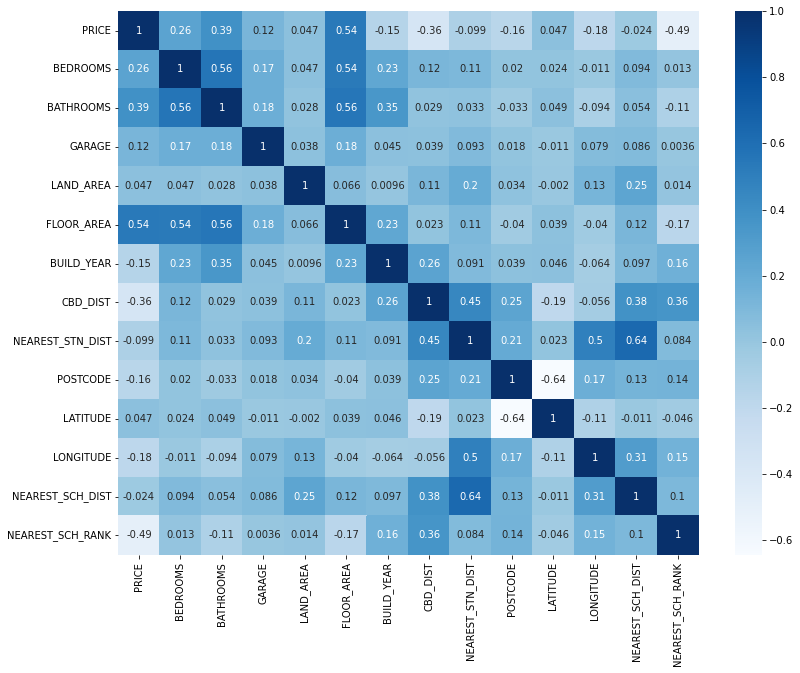

In [ ]:
plt.figure(figsize=(13,10))
g = sns.heatmap(train_df[top_corr_features].corr(),annot=True,cmap="Blues")

In [ ]:
# feature selection
train_df = train_df[top_corr_features]
test_df = test_df[train_df.columns.drop(['PRICE'])]

In [ ]:
train_y_label = train_df['PRICE'] 	# target 값을 미리 분리하였음.
train_df.drop(['PRICE'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
boston_df = pd.concat((train_df, test_df), axis=0)
boston_df_index = boston_df.index

print('Length of Boston Dataset : ',len(boston_df))
boston_df.head()

Length of Boston Dataset :  33656


,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,5,2,4.0,674,266,2007.0,35500,3000,6030,-31.656206,115.720566,1.079230,120.0
1,5,4,2.0,540,301,2014.0,16900,8100,6065,-31.800802,115.867675,0.667585,73.0
2,4,2,2.0,781,220,1992.0,33500,3500,6030,-31.682040,115.702600,0.650761,111.0
3,2,1,2.0,425,185,1938.0,3500,1500,6016,-31.926046,115.838181,0.484465,106.0
4,3,2,2.0,546,186,2004.0,12900,800,6159,-32.032079,115.759626,1.869050,25.0


In [ ]:
# check null 
check_null = boston_df.isna().sum() / len(boston_df)

# columns of null ratio >= 0.5
check_null[check_null >= 0.0]

BEDROOMS            0.000000
BATHROOMS           0.000000
GARAGE              0.000000
LAND_AREA           0.000000
FLOOR_AREA          0.000000
BUILD_YEAR          0.093743
CBD_DIST            0.000000
NEAREST_STN_DIST    0.000000
POSTCODE            0.000000
LATITUDE            0.000000
LONGITUDE           0.000000
NEAREST_SCH_DIST    0.000000
NEAREST_SCH_RANK    0.000000
dtype: float64

In [ ]:
remove_cols = check_null[check_null >= 0.5].keys()
boston_df = boston_df.drop(remove_cols, axis=1)

In [ ]:
boston_df.head()

,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,5,2,4.0,674,266,2007.0,35500,3000,6030,-31.656206,115.720566,1.079230,120.0
1,5,4,2.0,540,301,2014.0,16900,8100,6065,-31.800802,115.867675,0.667585,73.0
2,4,2,2.0,781,220,1992.0,33500,3500,6030,-31.682040,115.702600,0.650761,111.0
3,2,1,2.0,425,185,1938.0,3500,1500,6016,-31.926046,115.838181,0.484465,106.0
4,3,2,2.0,546,186,2004.0,12900,800,6159,-32.032079,115.759626,1.869050,25.0


In [ ]:
# split object & numeric
boston_obj_df = boston_df.select_dtypes(include='object')	# 카테고리형
boston_num_df = boston_df.select_dtypes(exclude='object')	# 수치형

In [ ]:
print('Object type columns:\n',boston_obj_df.columns)
print('---------------------------------------------------------------------------------')
print('Numeric type columns:\n',boston_num_df.columns)

Object type columns:
 Index([], dtype='object')
---------------------------------------------------------------------------------
Numeric type columns:
 Index(['BEDROOMS', 'BATHROOMS', 'GARAGE', 'LAND_AREA', 'FLOOR_AREA',
       'BUILD_YEAR', 'CBD_DIST', 'NEAREST_STN_DIST', 'POSTCODE', 'LATITUDE',
       'LONGITUDE', 'NEAREST_SCH_DIST', 'NEAREST_SCH_RANK'],
      dtype='object')


In [ ]:
# boston_dummy_df = pd.get_dummies(boston_obj_df, drop_first=True)
# boston_dummy_df.index = boston_df_index
# boston_dummy_df.head()
# boston_dummy_df = pd.DataFrame()

# from sklearn.preprocessing import LabelEncoder
# for col in boston_obj_df.columns:
#     le = LabelEncoder()
#     le.fit(boston_obj_df[col])
#     boston_dummy_df[col] = le.transform(boston_obj_df[col])


In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
imputer.fit(boston_num_df)
boston_num_df_ = imputer.transform(boston_num_df)
boston_num_df = pd.DataFrame(boston_num_df_, columns=boston_num_df.columns, index=boston_df_index)
boston_num_df.head()

,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,5.0,2.0,4.0,674.0,266.0,2007.0,35500.0,3000.0,6030.0,-31.656206,115.720566,1.079230,120.0
1,5.0,4.0,2.0,540.0,301.0,2014.0,16900.0,8100.0,6065.0,-31.800802,115.867675,0.667585,73.0
2,4.0,2.0,2.0,781.0,220.0,1992.0,33500.0,3500.0,6030.0,-31.682040,115.702600,0.650761,111.0
3,2.0,1.0,2.0,425.0,185.0,1938.0,3500.0,1500.0,6016.0,-31.926046,115.838181,0.484465,106.0
4,3.0,2.0,2.0,546.0,186.0,2004.0,12900.0,800.0,6159.0,-32.032079,115.759626,1.869050,25.0


In [ ]:
# boston_df = pd.merge(boston_dummy_df, boston_num_df, left_index=True, right_index=True)
# boston_df.head()

In [ ]:
# boston_df['PRICE'] = df['PRICE']

In [ ]:
# corrmat = boston_df.corr()
# top_corr_features = corrmat.index[abs(corrmat["PRICE"])>=0.01]
# top_corr_features

In [ ]:
# plt.figure(figsize=(13,10))
# g = sns.heatmap(train_df[top_corr_features].corr(),annot=True,cmap="Pastel1")

In [ ]:
# feature selection
# boston_df = boston_df[top_corr_features]

In [ ]:
boston_df = boston_num_df
boston_df.head()

,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,5.0,2.0,4.0,674.0,266.0,2007.0,35500.0,3000.0,6030.0,-31.656206,115.720566,1.079230,120.0
1,5.0,4.0,2.0,540.0,301.0,2014.0,16900.0,8100.0,6065.0,-31.800802,115.867675,0.667585,73.0
2,4.0,2.0,2.0,781.0,220.0,1992.0,33500.0,3500.0,6030.0,-31.682040,115.702600,0.650761,111.0
3,2.0,1.0,2.0,425.0,185.0,1938.0,3500.0,1500.0,6016.0,-31.926046,115.838181,0.484465,106.0
4,3.0,2.0,2.0,546.0,186.0,2004.0,12900.0,800.0,6159.0,-32.032079,115.759626,1.869050,25.0


In [ ]:
# from sklearn.preprocessing import StandardScaler
# std_scaler = StandardScaler()


train_df = boston_df[:len_train_df]
test_df = boston_df[len_train_df:]
# std_scaler.fit(train_df)
# train_df = std_scaler.transform(train_df)
# train_df = pd.DataFrame(train_df, columns = boston_df.columns)

# std_scaler.fit(test_df)
# test_df = std_scaler.transform(test_df)
# test_df = pd.DataFrame(test_df, columns = boston_df.columns)

train_df['PRICE'] = train_y_label

print('train set length: ',len(train_df))
print('test set length: ',len(test_df))


from sklearn.model_selection import train_test_split

X_train = train_df.drop(['PRICE'], axis=1)
y_train = train_df['PRICE']

# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True, random_state = 42)

X_test = test_df

train set length:  18510
test set length:  15146


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [ ]:
print('X_train : ',len(X_train))
# print('X_val : ',len(X_val))
print('X_test :',len(X_test))

X_train :  18510
X_test : 15146


In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

param = {
    'eta':[0.1, 0.2, 0.3],
    'n_estimators':range(550,700,50),
    'colsample_bytree':[0.5,0.7,1],
    'colsample_bylevel':[0.5,0.7,1],
}
model = xgb.XGBRegressor(max_depth = 5, seed = 42)
grid_search = GridSearchCV(estimator=model, param_grid=param, cv = 5,
                           scoring='neg_root_mean_squared_error',
                           n_jobs=-1)

grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

[05:44:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'colsample_bylevel': 0.7, 'colsample_bytree': 0.7, 'eta': 0.1, 'n_estimators': 650}
XGBRegressor(colsample_bylevel=0.7, colsample_bytree=0.7, eta=0.1, max_depth=5,
             n_estimators=650, seed=42)


In [ ]:
# X_train = boston_df

In [ ]:
import xgboost as xgb

model = xgb.XGBRegressor(eta = 0.1, n_estimators = 650, colsample_bylevel = 0.7, colsample_bytree = 0.7, max_depth = 5, seed = 42)
model.fit(X_train, y_train)

[09:43:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bylevel=0.7, colsample_bytree=0.7, eta=0.1, max_depth=5,
             n_estimators=650, seed=42)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

pred_train = model.predict(X_train)
# pred_val = model.predict(X_val)

print('train rmse score: ', mean_squared_error(y_train, pred_train)**0.5)
# print('val rmse score:', mean_squared_error(y_val, pred_val)**0.5)

train rmse score:  88004.34425248395


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
pred_train = grid_search.predict(X_train)
# pred_val = grid_search.predict(X_val)

print('train rmse score: ', mean_squared_error(y_train, pred_train)**0.5)
# print('val rmse score:', mean_squared_error(y_val, pred_val)**0.5)

train rmse score:  87988.12931101685


In [ ]:
test_y_pred = model.predict(X_test)
id_pred_df = pd.DataFrame()
id_pred_df['Id'] = test_id_idx
id_pred_df['PRICE'] = test_y_pred
id_pred_df.to_csv('rank+garage2.csv', index=False)

In [ ]:
id_pred_df

,Id,PRICE
0,18510,5.799046e+05
1,18511,1.527947e+06
2,18512,1.077169e+06
3,18513,4.528832e+05
4,18514,2.727838e+05
...,...,...
15141,33651,3.144622e+05
15142,33652,4.220862e+05
15143,33653,1.043269e+06
15144,33654,5.631757e+05
